# 第三章习题3  Titanic 数据集上的分类

##  Prepare the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#train = pd.read_csv("../input/titanic/train.csv")
train = pd.read_csv("datasets/titanic/train.csv")

*Take a glasp of dataset*

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data_val = pd.read_csv('datasets/titanic/test.csv')

In [5]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
data_val.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

*Check if there are repeated names*

In [7]:
name_count = train["Name"].value_counts().values

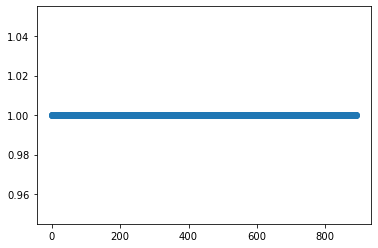

In [8]:
plt.scatter(range(len(name_count)), name_count)

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
604,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S
744,745,1,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,NaN,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
467,468,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,NaN,S
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S


In [12]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
train.columns[train.isna().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [15]:
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [16]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lehmann, Miss. Bertha",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [17]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

*Show digital data in figures*

In [18]:
train_label = train["Survived"]
y_train = train_label.values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fa7c2f2e8>,
      dtype=object)

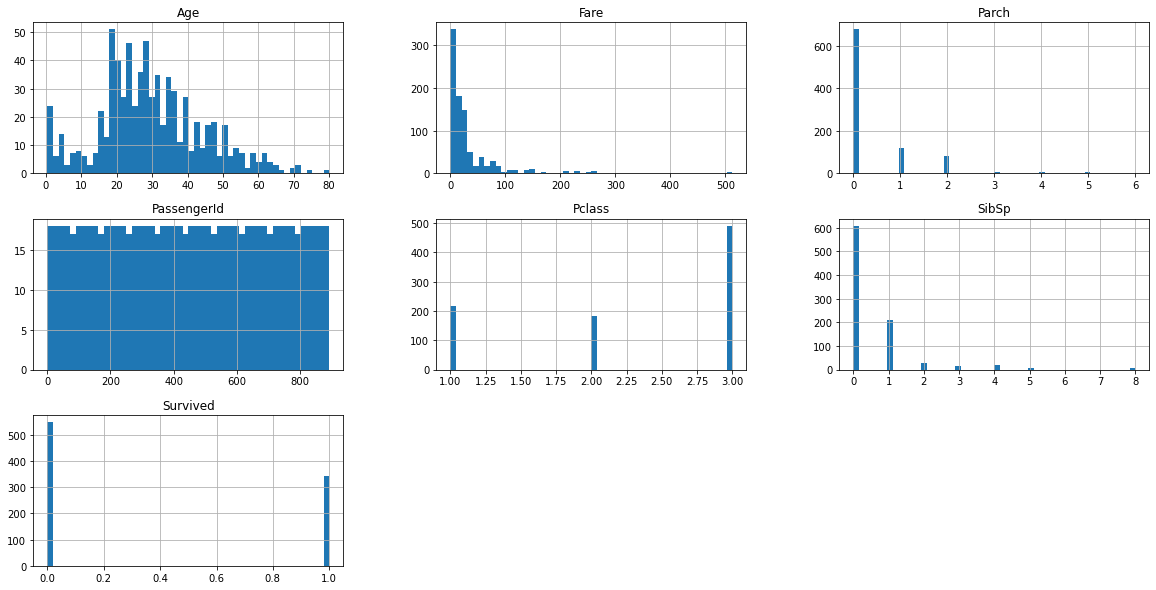

In [19]:
train.hist(bins=50,figsize=(20,10))

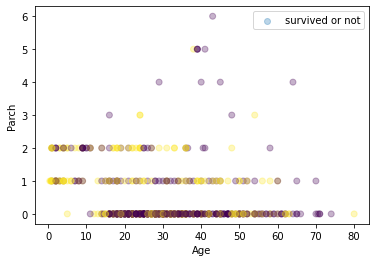

In [20]:
plt.scatter(train["Age"], train["Parch"], c=train_label, alpha=0.3,label='survived or not')
plt.xlabel("Age")
plt.ylabel("Parch")
plt.legend()

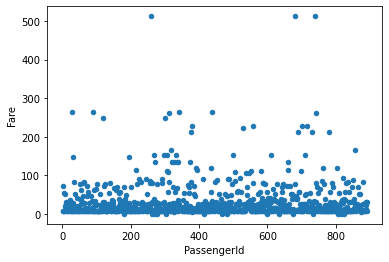

In [21]:
train.plot(kind='scatter',x='PassengerId',y='Fare')

In [22]:
train[['Survived', 'Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [23]:
train[['Survived', 'Embarked']].groupby('Embarked',as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


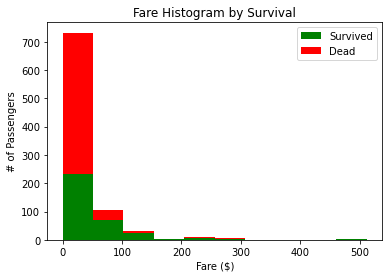

In [24]:
plt.hist(x = [train[train['Survived']==1]['Fare'], train[train['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

*Clean the data*

In [25]:
train_feat = train.drop("Survived", axis=1)
#train_feat.info()

In [26]:
data_cleaner = [train_feat, data_val]

In [27]:
for data in data_cleaner:
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data['Fare'].fillna(data['Fare'].median(), inplace=True)

In [28]:
exclude_index = ['PassengerId', 'Ticket', 'Cabin']
train_feat.drop(exclude_index, axis=1, inplace=True)

In [29]:
train_feat.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [30]:
data_val.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [31]:
train_feat['Name'].sample(10)

633                     Parr, Mr. William Henry Marsh
675                    Edvardsson, Mr. Gustaf Hjalmar
526                              Ridsdale, Miss. Lucy
813                Andersson, Miss. Ebba Iris Alfrida
863                 Sage, Miss. Dorothy Edith "Dolly"
756                      Carlsson, Mr. August Sigfrid
253                          Lobb, Mr. William Arthur
798                      Ibrahim Shawah, Mr. Yousseff
178                                Hale, Mr. Reginald
40     Ahlin, Mrs. Johan (Johanna Persdotter Larsson)
Name: Name, dtype: object

In [32]:
for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['Alone'] = 1
    dataset['Alone'].loc[dataset['FamilySize'] > 1] = 0 
    dataset['Title'] = dataset['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
#     dataset['Title'] = dataset['Title'].apply(lambda x: 'Misc' if title_name[x] else x)

/home/ligy/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
train_feat[['Alone', 'FamilySize', 'SibSp', 'Parch', 'Title']].sample(10)

,Alone,FamilySize,SibSp,Parch,Title
587,0,3,1,1,Mr
70,1,1,0,0,Mr
720,0,2,0,1,Miss
712,0,2,1,0,Mr
168,1,1,0,0,Mr
667,1,1,0,0,Mr
807,1,1,0,0,Miss
517,1,1,0,0,Mr
389,1,1,0,0,Miss
731,1,1,0,0,Mr


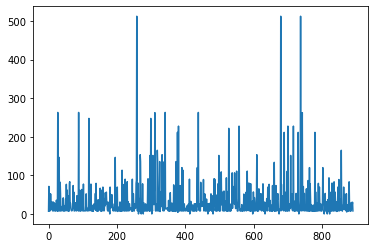

In [34]:
train_feat['Fare'].plot()

In [35]:
title_name = train_feat['Title'].value_counts() < 10
#title_name['Mr']
title_name

Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Major            True
Col              True
Mlle             True
the Countess     True
Ms               True
Jonkheer         True
Lady             True
Mme              True
Sir              True
Don              True
Capt             True
Name: Title, dtype: bool

In [36]:
train_feat['Title'] = train_feat['Title'].apply(lambda x: 'Misc' if title_name[x] else x)

In [37]:
train_feat['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder 
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

In [39]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# # label = LabelEncoder()
# label = OneHotEncoder()
# for dataset in data_cleaner:    
#     dataset['Sex_Code'] = label.fit_transform(dataset['Sex'].values.reshape(-1,1))
#     dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'].values.reshape(-1,1))
#     dataset['Title_Code'] = label.fit_transform(dataset['Title'].values.reshape(-1,1))
#     dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'].astype(str).values.reshape(-1,1))
#     dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'].astype(str).values.reshape(-1,1))

In [40]:
drop_columns = ['Name', 'Sex', 'Embarked', 'Title', 'AgeBin', 'FareBin']
train_feat.drop(drop_columns, axis=1, inplace=True)
data_val.drop(drop_columns, axis=1, inplace=True)

In [41]:
data_val.drop(exclude_index, axis=1, inplace=True)

In [42]:
train_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         891 non-null    int64  
 1   Age            891 non-null    float64
 2   SibSp          891 non-null    int64  
 3   Parch          891 non-null    int64  
 4   Fare           891 non-null    float64
 5   FamilySize     891 non-null    int64  
 6   Alone          891 non-null    int64  
 7   Sex_Code       891 non-null    int64  
 8   Embarked_Code  891 non-null    int64  
 9   Title_Code     891 non-null    int64  
 10  AgeBin_Code    891 non-null    int64  
 11  FareBin_Code   891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [43]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Age            418 non-null    float64
 2   SibSp          418 non-null    int64  
 3   Parch          418 non-null    int64  
 4   Fare           418 non-null    float64
 5   FamilySize     418 non-null    int64  
 6   Alone          418 non-null    int64  
 7   Sex_Code       418 non-null    int64  
 8   Embarked_Code  418 non-null    int64  
 9   Title_Code     418 non-null    int64  
 10  AgeBin_Code    418 non-null    int64  
 11  FareBin_Code   418 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 39.3 KB


In [44]:
a = train_feat.columns == data_val.columns
a

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

*split train and test*

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_feat.values,
                                                    train['Survived'].values,
                                                    test_size=0.2,
                                                    random_state=42
                                                   )
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 12), (712,), (179, 12), (179,))

*visualizatioins*

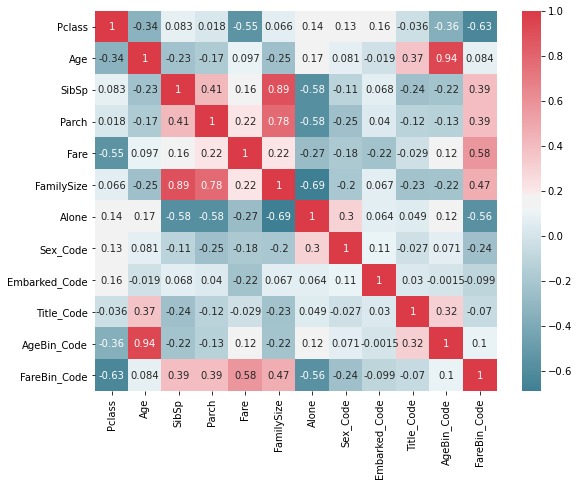

In [46]:
import seaborn as sns
plt.figure(figsize=(9,7))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(train_feat.corr(), annot=True, cmap=colormap)

*model data: randomforest*

In [47]:
from sklearn.ensemble import RandomForestClassifier
alg = RandomForestClassifier()
alg.fit(X_train, y_train)
# print(alg.score(X_train, y_train), alg.score(X_test, y_test))
# for feat, score in zip(train_feat.columns, alg.feature_importances_):
#     print(feat,": ", score)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
b = np.c_[train_feat.columns, alg.feature_importances_]
sorted(b, key=lambda x:x[1],reverse=True )

[array(['Fare', 0.22100603174867678], dtype=object),
 array(['Sex_Code', 0.19652186078204703], dtype=object),
 array(['Age', 0.19396607405418873], dtype=object),
 array(['Title_Code', 0.10962148111437327], dtype=object),
 array(['Pclass', 0.06478020378769564], dtype=object),
 array(['FamilySize', 0.04890447710258061], dtype=object),
 array(['FareBin_Code', 0.041076799453204305], dtype=object),
 array(['AgeBin_Code', 0.0354129271587807], dtype=object),
 array(['Embarked_Code', 0.031426645826099366], dtype=object),
 array(['SibSp', 0.027850129534319534], dtype=object),
 array(['Parch', 0.018686350948528323], dtype=object),
 array(['Alone', 0.010747018489505858], dtype=object)]

*overfit! evaluate modes by corss-validating*

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
algs = [RandomForestClassifier(),
       GradientBoostingClassifier(),
       AdaBoostClassifier(),
       SVC()]
for alg in algs:
    score = cross_val_score(alg, X_train, y_train, cv=5)
    score_test = cross_val_score(alg, X_train, y_train, cv=5)
    print(alg.__class__.__name__,':', score.mean(), '   test:', score_test.mean())

RandomForestClassifier : 0.7921205555008373    test: 0.7949473062149119
GradientBoostingClassifier : 0.8075445681079485    test: 0.8075445681079485
AdaBoostClassifier : 0.8159657244164287    test: 0.8159657244164287
SVC : 0.6713188220230475    test: 0.6713188220230475


- 提前停止法

In [50]:
n_estimators = 120
learning_rate = 0.1
max_depth = 2
current_error = 0
count = 0
gbdt = GradientBoostingClassifier(learning_rate=learning_rate,
                                 max_depth=max_depth,
                                 warm_start=True)
error = pd.DataFrame(columns = ['score'])
for epoch in range(n_estimators):
    gbdt.n_estimators = epoch
    score = cross_val_score(gbdt, X_train, y_train, cv=5).mean()
#     print(epoch, score)
    error.loc[epoch, 'score'] = score
    if score > current_error:
        current_error = score
        count = 0
    else:
        count += 1
        if count > 5:
            break


/home/ligy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than 0 but was 0

  FitFailedWarning)
/home/ligy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than 0 but was 0

  FitFailedWarning)
/home/ligy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than 0 but was 0

  FitFailedWarning)
/home/ligy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: F

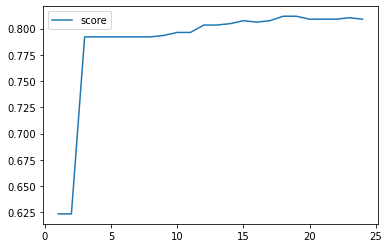

In [51]:
error.plot(kind='line')

- 随机网格搜索

0.8201713779178567


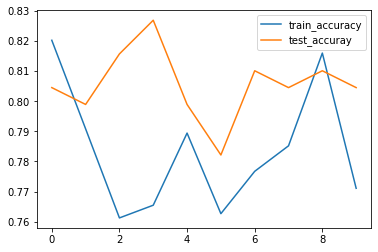

In [68]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, classification_report

error_grid = pd.DataFrame(columns = ['train_accuracy', 'test_accuray', 'params'])
ind = 0
# MLA = [LinearRegression(),
#        ElasticNet(),
#        SVC(),
#        DecisionTreeClassifier(),
#        RandomForestClassifier(),
#        AdaBoostClassifier(),
#        GradientBoostingClassifier()
#       ]

gbdt = GradientBoostingClassifier()
param_grid = {'n_estimators': range(20,200), 
              'max_depth': range(1, 30), 
              'learning_rate': [0.01, 0.03, 0.1, 0.2, 0.3]
             }
grid_search = RandomizedSearchCV(gbdt, param_grid, cv=5, scoring='accuracy') 
grid_search.fit(X_train, y_train)
# r2_score(grid_search.best_estimators_.predict(X_test), y_test)
cv_results = grid_search.cv_results_

for mean_score, param in zip(cv_results['mean_test_score'], cv_results['params']):
#     error_grid.loc[ind, 'scorer'] = grid_search.scorer_
    error_grid.loc[ind, 'train_accuracy'] = mean_score
    model = gbdt.set_params(**param)
    model.fit(X_train, y_train)
    error_grid.loc[ind, 'test_accuray'] = model.score(X_test, y_test)
    error_grid.loc[ind, 'n_estimators'] = param['n_estimators']
    error_grid.loc[ind, 'max_depth'] = param['max_depth']
    error_grid.loc[ind, 'learning_rate'] = param['learning_rate'] 
    ind += 1
# print(error_grid)
print(error_grid.train_accuracy.max())
error_grid[['train_accuracy', 'test_accuray']].plot(kind='line')

In [69]:
error_grid

,train_accuracy,test_accuray,params,n_estimators,max_depth,learning_rate
0,0.820171,0.804469,NaN,63.0,3.0,0.10
1,0.790791,0.798883,NaN,116.0,12.0,0.30
2,0.761243,0.815642,NaN,144.0,27.0,0.01
3,0.765458,0.826816,NaN,23.0,29.0,0.20
4,0.789382,0.798883,NaN,190.0,12.0,0.20
5,0.762651,0.782123,NaN,190.0,16.0,0.03
6,0.776697,0.810056,NaN,190.0,18.0,0.20
7,0.785157,0.804469,NaN,176.0,16.0,0.30
8,0.815926,0.810056,NaN,34.0,2.0,0.30
9,0.771073,0.804469,NaN,79.0,16.0,0.10


- 网格搜索超参

In [71]:
error_grid2 = pd.DataFrame()#columns = ['train_accuracy', 'test_accuray', 'params'])
ind = 0
gbdt = GradientBoostingClassifier()
param_grid = {'n_estimators': range(2, 60),
             'max_depth': range(2, 10),
             'learning_rate': [0.01, 0.03, 0.1, 0.2, 0.3]
             }
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(gbdt, param_grid, cv=5, scoring='accuracy') 
grid_search.fit(X_train, y_train)
# r2_score(grid_search.best_estimators_.predict(X_test), y_test)
cv_results = grid_search.cv_results_

for mean_score, param in zip(cv_results['mean_test_score'], cv_results['params']):
#     error_grid.loc[ind, 'scorer'] = grid_search.scorer_
    error_grid2.loc[ind, 'train_accuracy'] = mean_score
    model = gbdt.set_params(**param)
    model.fit(X_train, y_train)
    error_grid2.loc[ind, 'test_accuray'] = model.score(X_test, y_test)
    error_grid2.loc[ind, 'n_estimators'] = param['n_estimators']
    error_grid2.loc[ind, 'max_depth'] = param['max_depth']
    error_grid2.loc[ind, 'learning_rate'] = param['learning_rate'] 
    ind += 1
error_grid2

,train_accuracy,test_accuray,n_estimators,max_depth,learning_rate
0,0.623599,0.586592,2.0,2.0,0.01
1,0.623599,0.586592,3.0,2.0,0.01
2,0.623599,0.586592,4.0,2.0,0.01
3,0.623599,0.586592,5.0,2.0,0.01
4,0.623599,0.586592,6.0,2.0,0.01
...,...,...,...,...,...
2315,0.782380,0.810056,55.0,9.0,0.30
2316,0.779563,0.821229,56.0,9.0,0.30
2317,0.795036,0.815642,57.0,9.0,0.30
2318,0.780971,0.826816,58.0,9.0,0.30


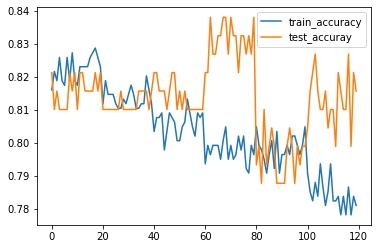

In [55]:
error_grid2.plot(kind='line')

In [74]:
    error_grid2[error_grid2.test_accuray == error_grid2.test_accuray.max()]

,train_accuracy,test_accuray,n_estimators,max_depth,learning_rate
923,0.800591,0.854749,55.0,9.0,0.03


- 多个算法的网格搜索

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

clf_list = [KNeighborsClassifier(),
          LogisticRegression(),
          LinearDiscriminantAnalysis(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          SVC(),
          GradientBoostingClassifier()]

knn_params = {'n_neighbors':np.linspace(1,50,5, dtype=int),
             'weights':['uniform','distance'], 
             'metric':['euclidean','minkowski']}

lg_params = {'penalty':['l1','l2'],
            'C':np.logspace(-1,0,6)}

lda_prarams = {'solver':['svd','eigen']}


dt_params = {'criterion':['gini','entropy'],
             'min_samples_leaf':range(1,65,10), # samples required to be a leaf(not an internal node)
             'max_depth':range(1,20,3)} 

rf_params = {'n_estimators':range(100,301,100),
             'bootstrap':[False]}

svc_params = {'C':np.logspace(0,2,4),
             'gamma':np.logspace(-1,0,4),
             'probability':[True],
             'kernel': ['rbf', 'linear', 'poly']}

gbdt_params = {'n_estimators' : range(100, 301, 100),
             'min_samples_leaf':range(1,65,10), # samples required to be a leaf(not an internal node)
             'max_depth':range(1,20,3)} 

grid_params = [knn_params, lg_params, lda_prarams, dt_params, rf_params, svc_params, gbdt_params]

In [95]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv_results = []
best_estimators = []

for clf, param in zip(clf_list, grid_params):
    
    gs  = GridSearchCV(estimator= clf, param_grid= param, cv= StratifiedKFold(5), scoring='accuracy')
    gs.fit(X_train, y_train)
    
    cv_results.append(gs.best_score_)
    best_estimators.append(gs.best_estimator_)
    print(str(clf),'\n\naccuracy: ',gs.best_score_,'\n\n')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 

accuracy:  0.7134836993991923 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 

accuracy:  0.7963360583078891 


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001) 

accuracy:  0.7934994582881907 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
 

In [96]:
from sklearn.ensemble import VotingClassifier


for voting in ('hard', 'soft'):
    globals()['votingclf_' + voting] = VotingClassifier(estimators=[#('knn', best_estimators[0]),
                                             ('logreg', best_estimators[1]), 
                                             #('lda', best_estimators[2]), 
                                             ('dt', best_estimators[3]), 
                                             ('rf', best_estimators[4]),
                                             ('svc', best_estimators[5]),
                                             ('dbdt', best_estimators[6])],
                                             voting=voting)
    
    globals()['votingclf_' + voting] = globals()['votingclf_' + voting].fit(X_train, y_train)
    print('accuracy for voting = {}: {}'.format(voting, globals()['votingclf_' + voting].score(X_train, y_train)))

accuracy for voting = hard: 0.9213483146067416
accuracy for voting = soft: 0.9438202247191011
